In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Пуассоновский процесс

1. $X_0 =0 $ п.в.
2. Независ. приращения (то есть любые разбиения на  $X_{t_k} - X_{t_{k+1}}$ -- независимы в совокупности)
3. $X_t - X_s \sim Pois(\lambda (t- s))$

$P(X_t -X_s = k ) = \frac{e^{-\lambda(t-s)} \lambda^k (t-s)^k}{k!}$

In [20]:
def generate_poisson( lam , t_array=None , size= 1000 ) :
    X = np.zeros(size)
    if t_array is None :
        for i in range(1,size) :
            X[i] = X[i-1] + np.random.poisson(lam = lam)
    else :
        values = t_array[1:] - t_array[:-1]
        delta_X = np.random.poisson(lam = lam* values)
        X[1:] = np.cumsum(delta_X)
    return X

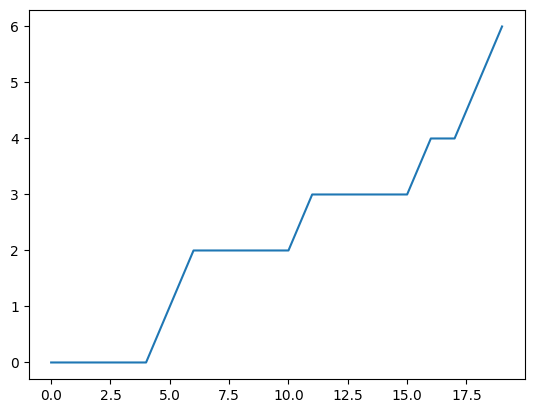

In [24]:
X = generate_poisson(lam = 0.3 , size = 20)
plt.plot(X)
plt.show()

## Явная конструкция Пуассоновского процесса

* $\xi_1 .. \xi_n $ - нез. в совокуп. и $\sim Exp(\lambda)$

* Тогда $X_t = sup\{\sum \xi_k \le t \}$ -Пуассоновский с параметром $\lambda$

## Следствия:
1. С $\mathbb{P} = 1$ - все скачки единичные.
2. $\tau_n - \tau_{n-1} \sim Exp(\lambda)$
3. $\tau_n \sim Erl(n , \lambda)$ , где $\mathbb{P}_{\tau_n}(x) = \mathbb{1}_{[x \ge 0]} \frac{x^{n-1}\lambda^n}{(n-1)!} e^{-\lambda x}$
4. Количество событий на конечном отрезке времени -- конечно с $\mathbb{P} = 1$, и зависит только от длины отрезка.
5. $\mathbb{P} (K_{t+h} - K_t > 1) = o(h)$
6. $\mathbb{P} (K_{t+h} - K_t > 0) =1 - e^{-\lambda h} =  \lambda h + o(h)$

* $R_K(t,s) = \mathbb{E} \overline{K_t}\cdot \overline{K_s}$

* $\mathbb{E} K_t = \lambda \cdot t$

## Свойства:
1. $R_K(t,s) = \lambda \min (t,s)$
2. $R_K(t,t) = \mathbb{D} K_t = \lambda \cdot t$


In [92]:
def poisson_process(lam, size):
    inter_arrival_times = np.random.exponential(scale=1/lam, size=size)
    arrival_times = np.cumsum(inter_arrival_times)
    return arrival_times
def plot_poisson_process(process_times, lam):

    mean = lam*np.arange(process_times[-1])

    plt.figure(figsize=(10, 6))
    lower_bound = st.poisson(mu = mean).ppf(0.025)
    upper_bound = st.poisson(mu = mean).ppf(0.975)

    plt.plot(mean , label ='mean')
    plt.plot(process_times , np.arange(len(process_times)) , label ='Poss process')

    plt.fill_between( np.arange(len(mean)) , lower_bound, upper_bound, color='yellow', alpha=0.3, label='95% Confidence')
    plt.xlabel('Time')
    plt.ylabel('Number of events')
    plt.title(f'Poisson Process (λ={lam})')
    plt.legend()
    plt.grid(True)
    plt.show()





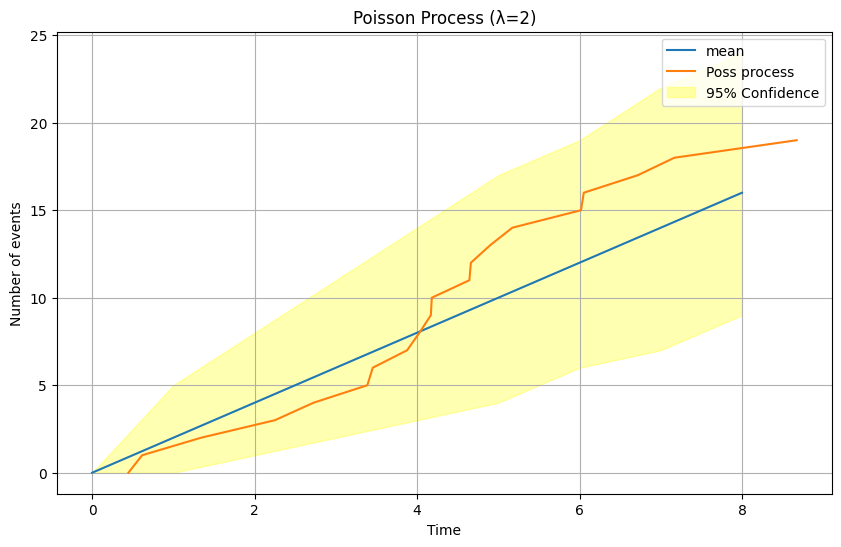

In [94]:
lam = 2
size = 20
arrival_times = poisson_process(lam, size)
plot_poisson_process(arrival_times, lam)

## Сложный пуассоновский процесс

* $K_c (t) = \sum\limits_{i=1}^{K(t)} \xi_i$ , где $\{\xi \}$ - нез в совокупн.

* Неоднородный пуасс. прцоесс: $K_t - K_s \sim Pois(\int\limits_s^t \lambda(\tau) d \tau )$ , где $\lambda(\tau) \ge 0 $ -- интегриуемая на любом борель. множестве

In [119]:

def complex_poisson(int_lam , size = 100) :
    X = np.zeros(size)
    mu_arr = int_lam(np.arange(1,size) , np.arange(0,size-1))
    X[1:] = np.cumsum(np.random.poisson(mu_arr))
    return X
# Для lambda(tau) = const/(1 + tau)
def int_lam(t,s, const = 10) :
    return const * (np.log(t+1) - np.log(s+1))

def plot_complex_poisson_process(process, lam):

    mean = int_lam(np.arange(len(process)) , 0)

    plt.figure(figsize=(10, 6))
    lower_bound = st.poisson(mu = mean).ppf(0.025)
    upper_bound = st.poisson(mu = mean).ppf(0.975)

    plt.plot(mean , label ='mean')
    plt.plot(process , label ='Poss process')

    plt.fill_between( np.arange(len(mean)) , lower_bound, upper_bound, color='yellow', alpha=0.3, label='95% Confidence')
    plt.xlabel('Time')
    plt.ylabel('Number of events')
    plt.title(f'Poisson Process (λ(tau)=const/(tau + 1 ))')
    plt.legend()
    plt.grid(True)
    plt.show()


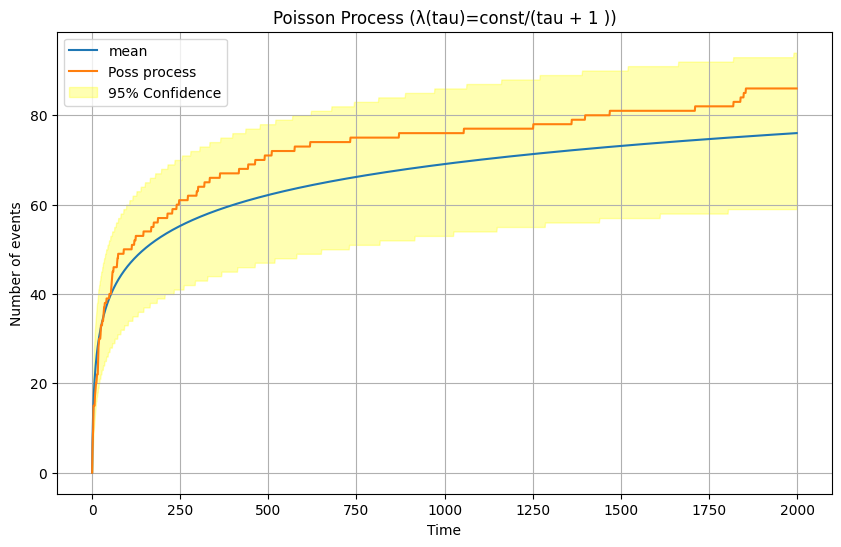

In [120]:

size = 2000
complex_poisson_arr = complex_poisson(int_lam= int_lam, size = size)
plot_complex_poisson_process(complex_poisson_arr, int_lam)